# 1. 문제 정의

* **데이터셋 출처**
 keras.datasets에 포함된 imdb<br>
 https://keras.io/api/datasets/imdb/

  

* **문제 정의**<br>
  영화평 감정분석을 하는 모델을 만들어 봅니다. 감정은 긍정/부정으로 나뉘어져있으므로 '이진분류'문제입니다.
'분류'문제를 해결하기 위한 Classifier를 모델로 설정하고, 모델 평가는 Accuracy를 사용할 수 있습니다.

라이브러리 임포트

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

Using TensorFlow backend.


# 2. 데이터 전처리

## (1) 학습데이터 로딩 및 데이터 분할

keras 내장 함수를 활용하여 학습데이터 로딩 및 데이터 분할을 한번에 진행합니다.

In [2]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

## (2) EDA

In [3]:
print("학습데이터 셋의 수:{0}, 테스트데이터 셋의 수:{1}\n".format(len(x_train), len(y_train)))
for index in range(10):
    print('x_train의 {0}번째 데이터의 글자 수:{1}'.format(index, len(x_train[index])))

학습데이터 셋의 수:25000, 테스트데이터 셋의 수:25000

x_train의 0번째 데이터의 글자 수:218
x_train의 1번째 데이터의 글자 수:189
x_train의 2번째 데이터의 글자 수:141
x_train의 3번째 데이터의 글자 수:550
x_train의 4번째 데이터의 글자 수:147
x_train의 5번째 데이터의 글자 수:43
x_train의 6번째 데이터의 글자 수:123
x_train의 7번째 데이터의 글자 수:562
x_train의 8번째 데이터의 글자 수:233
x_train의 9번째 데이터의 글자 수:130


In [4]:
import pandas as pd

df = pd.DataFrame(x_train, columns=['review'])
df['length'] = df['review'].apply(lambda x: len(df['review'][x]))
df['sentimental'] = y_train
df.head()

,review,length,sentimental
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",218,1
1,"[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 43...",189,0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 2...",141,0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",550,1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",147,0


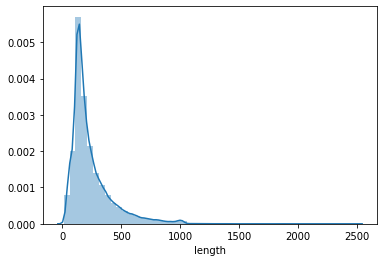

In [5]:
import seaborn as sns
sns.distplot(df['length'])

In [6]:
df.describe()

,length,sentimental
count,25000.000000,25000.00000
mean,238.713640,0.50000
std,176.497204,0.50001
min,11.000000,0.00000
25%,130.000000,0.00000
50%,178.000000,0.50000
75%,291.000000,1.00000
max,2494.000000,1.00000


In [7]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=180)
x_test = sequence.pad_sequences(x_test, maxlen=180)

# 3. 학습모델1(머신러닝)

# 4. 학습모델2(딥러닝)

In [8]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 180))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 180)         900000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 180)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          57664     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

C:\Users\0biwa\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.4121 - accuracy: 0.7917 - val_loss: 0.2995 - val_accuracy: 0.8711
Epoch 2/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.2400 - accuracy: 0.9039 - val_loss: 0.2920 - val_accuracy: 0.8791
Epoch 3/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.1979 - accuracy: 0.9230 - val_loss: 0.2882 - val_accuracy: 0.8782
Epoch 4/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1533 - accuracy: 0.9434 - val_loss: 0.3137 - val_accuracy: 0.8772
Epoch 5/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1187 - accuracy: 0.9574 - val_loss: 0.3576 - val_accuracy: 0.8714


# 5. 평가

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 9s 354us/step

 Test Accuracy: 0.8714


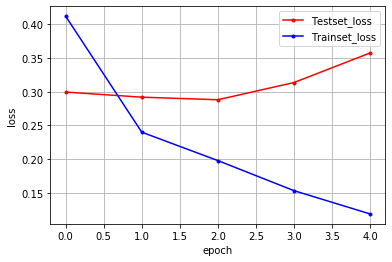

In [10]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 6. 개선